<a href="https://colab.research.google.com/github/yasminssgf/EDA-E-Commerce-Sales/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import plotly.express as px
plt.style.use('fivethirtyeight') #To change the appearance of the graph to follow the visual style of the well-known data journalism site, FiveThirtyEight.

df = pd.read_csv('/content/Ecommerce_Sales_Data_2024_2025.csv')
df.head()

,Order ID,Order Date,Customer Name,Region,City,Category,Sub-Category,Product Name,Quantity,Unit Price,Discount,Sales,Profit,Payment Mode
0,10001,2024-10-19,Kashvi Varty,South,Bangalore,Books,Non-Fiction,Non-Fiction Ipsum,2,36294,5,68958.6,10525.09,Debit Card
1,10002,2025-08-30,Advik Desai,North,Delhi,Groceries,Rice,Rice Nemo,1,42165,20,33732.0,6299.66,Debit Card
2,10003,2023-11-04,Rhea Kalla,East,Patna,Kitchen,Juicer,Juicer Odio,4,64876,20,207603.2,19850.27,Credit Card
3,10004,2025-05-23,Anika Sen,East,Kolkata,Groceries,Oil,Oil Doloribus,5,37320,15,158610.0,36311.02,UPI
4,10005,2025-01-19,Akarsh Kaul,West,Pune,Clothing,Kids Wear,Kids Wear Quo,1,50037,10,45033.3,9050.04,Debit Card


In [4]:
#Data Understanding
df.shape #Tells how many rows and how many columns are in a table.

(5000, 14)

In [5]:
df.dtypes #To check the data type of each column in the DataFrame

,0
Order ID,int64
Order Date,object
Customer Name,object
Region,object
City,object
Category,object
Sub-Category,object
Product Name,object
Quantity,int64
Unit Price,int64


In [6]:
df.nunique() #To check how many unique values are in each column

,0
Order ID,5000
Order Date,730
Customer Name,4844
Region,4
City,20
Category,10
Sub-Category,50
Product Name,3835
Quantity,5
Unit Price,4841


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       5000 non-null   int64  
 1   Order Date     5000 non-null   object 
 2   Customer Name  5000 non-null   object 
 3   Region         5000 non-null   object 
 4   City           5000 non-null   object 
 5   Category       5000 non-null   object 
 6   Sub-Category   5000 non-null   object 
 7   Product Name   5000 non-null   object 
 8   Quantity       5000 non-null   int64  
 9   Unit Price     5000 non-null   int64  
 10  Discount       5000 non-null   int64  
 11  Sales          5000 non-null   float64
 12  Profit         5000 non-null   float64
 13  Payment Mode   5000 non-null   object 
dtypes: float64(2), int64(4), object(8)
memory usage: 547.0+ KB


**Data Preparation**

In [8]:
# Identifying any missing values
df.isna().sum()

,0
Order ID,0
Order Date,0
Customer Name,0
Region,0
City,0
Category,0
Sub-Category,0
Product Name,0
Quantity,0
Unit Price,0


In [9]:
# Identifying duplicated data
df.duplicated().sum()

np.int64(0)

In [ ]:
# Drop duplicated data
#df = df.drop_duplicates()
#df.shape

In [10]:
#Change a column with a object data type to an datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%Y-%m-%d')
df.head()

,Order ID,Order Date,Customer Name,Region,City,Category,Sub-Category,Product Name,Quantity,Unit Price,Discount,Sales,Profit,Payment Mode
0,10001,2024-10-19,Kashvi Varty,South,Bangalore,Books,Non-Fiction,Non-Fiction Ipsum,2,36294,5,68958.6,10525.09,Debit Card
1,10002,2025-08-30,Advik Desai,North,Delhi,Groceries,Rice,Rice Nemo,1,42165,20,33732.0,6299.66,Debit Card
2,10003,2023-11-04,Rhea Kalla,East,Patna,Kitchen,Juicer,Juicer Odio,4,64876,20,207603.2,19850.27,Credit Card
3,10004,2025-05-23,Anika Sen,East,Kolkata,Groceries,Oil,Oil Doloribus,5,37320,15,158610.0,36311.02,UPI
4,10005,2025-01-19,Akarsh Kaul,West,Pune,Clothing,Kids Wear,Kids Wear Quo,1,50037,10,45033.3,9050.04,Debit Card


In [ ]:
# Convert 'Product Name' value to title case.
#df['Product Name'] = df['Product Name'].str.title()
#df.head()

In [11]:
# Create 'Revenue' column, to find out E-Commerce income.
df['Revenue'] = (df['Quantity'] * df['Unit Price']) * (1 - (df['Discount'] / 100))
df.head()

,Order ID,Order Date,Customer Name,Region,City,Category,Sub-Category,Product Name,Quantity,Unit Price,Discount,Sales,Profit,Payment Mode,Revenue
0,10001,2024-10-19,Kashvi Varty,South,Bangalore,Books,Non-Fiction,Non-Fiction Ipsum,2,36294,5,68958.6,10525.09,Debit Card,68958.6
1,10002,2025-08-30,Advik Desai,North,Delhi,Groceries,Rice,Rice Nemo,1,42165,20,33732.0,6299.66,Debit Card,33732.0
2,10003,2023-11-04,Rhea Kalla,East,Patna,Kitchen,Juicer,Juicer Odio,4,64876,20,207603.2,19850.27,Credit Card,207603.2
3,10004,2025-05-23,Anika Sen,East,Kolkata,Groceries,Oil,Oil Doloribus,5,37320,15,158610.0,36311.02,UPI,158610.0
4,10005,2025-01-19,Akarsh Kaul,West,Pune,Clothing,Kids Wear,Kids Wear Quo,1,50037,10,45033.3,9050.04,Debit Card,45033.3


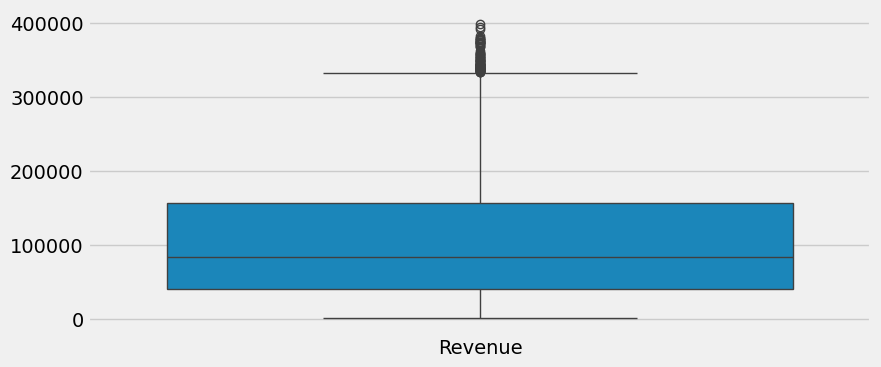

In [12]:
plt.figure(figsize = (9, 4))
outlier = pd.DataFrame(data=df, columns = ['Revenue'])
sns.boxplot(data=outlier)
plt.show()

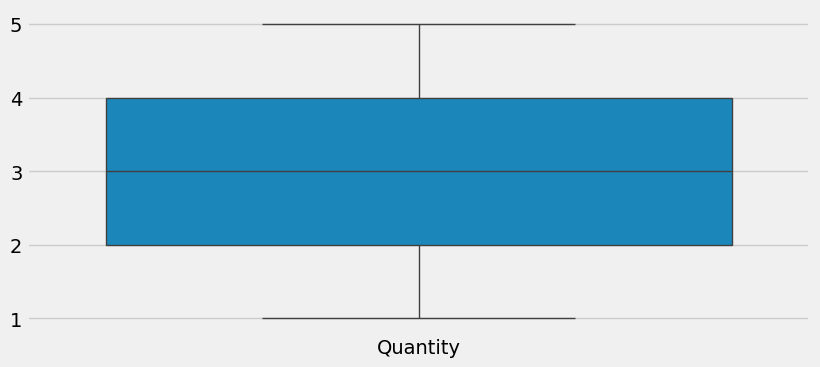

In [13]:
plt.figure(figsize = (9, 4))
outlier = pd.DataFrame(data=df, columns = ['Quantity'])
sns.boxplot(data=outlier)
plt.show()

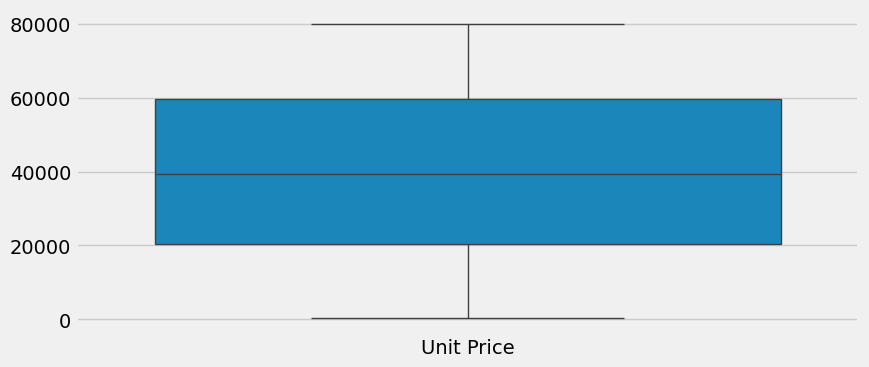

In [14]:
plt.figure(figsize = (9, 4))
outlier = pd.DataFrame(data=df, columns = ['Unit Price'])
sns.boxplot(data=outlier)
plt.show()

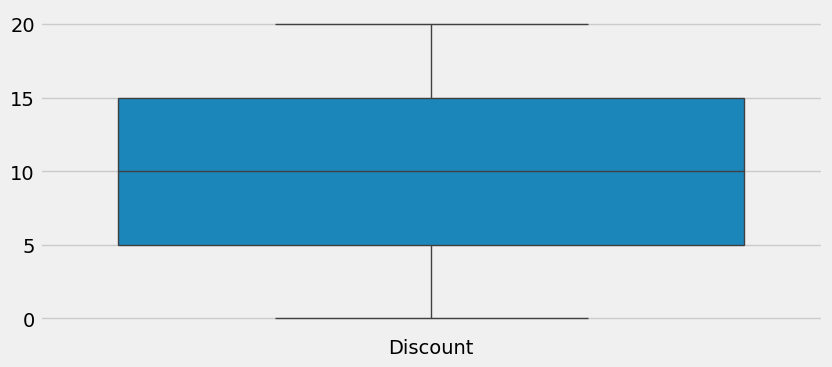

In [15]:
plt.figure(figsize = (9, 4))
outlier = pd.DataFrame(data=df, columns = ['Discount'])
sns.boxplot(data=outlier)
plt.show()

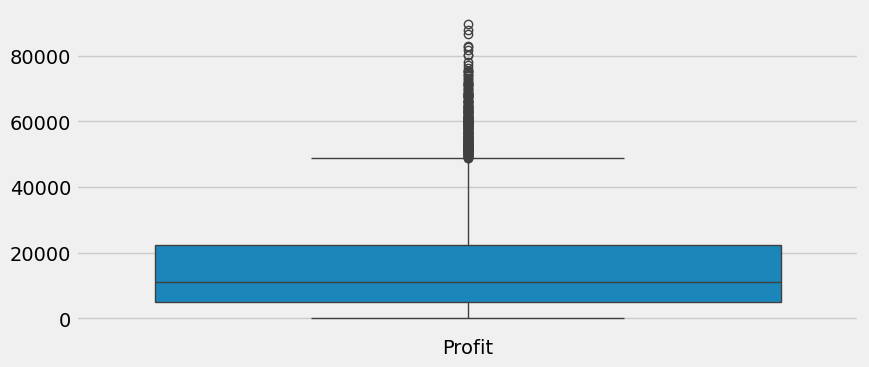

In [16]:
plt.figure(figsize = (9, 4))
outlier = pd.DataFrame(data=df, columns = ['Profit'])
sns.boxplot(data=outlier)
plt.show()

In [ ]:
# Drop global outliers
df = df.loc[~(df['Revenue'] >= 300000)].reset_index(drop = True)
df = df.loc[~(df['Profit'] >= 40000)].reset_index(drop = True)
df.shape

(4524, 15)

In [ ]:
Q1 = df['Revenue'].quantile(0.25)
Q3 = df['Revenue'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan batas atas
batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5 * IQR

# Memfilter data (menghapus outlier)
df_bersih = df[(df['Revenue'] >= batas_bawah) & (df['Revenue'] <= batas_atas)]

print(f"Jumlah data sebelum: {len(df)}")
print(f"Jumlah data setelah outlier dihapus: {len(df_bersih)}")

Jumlah data sebelum: 5000
Jumlah data setelah outlier dihapus: 4925


In [ ]:
from scipy import stats

# Remove outliers using Z-score (keep data within 3 standard deviations)
z_scores = np.abs(stats.zscore(df[['Profit', 'Revenue']]))
df_no_outliers = df[(z_scores < 3).all(axis=1)]

print(f"Original shape: {df.shape}")
print(f"After removing outliers: {df_no_outliers.shape}")
print(f"Removed {len(df) - len(df_no_outliers)} outliers")

Original shape: (5000, 15)
After removing outliers: (4900, 15)
Removed 100 outliers


In [17]:
# Remove outliers using IQR method
Q1 = df[['Profit', 'Revenue']].quantile(0.25)
Q3 = df[['Profit', 'Revenue']].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[['Profit', 'Revenue']] < (Q1 - 1.5 * IQR)) |
                      (df[['Profit', 'Revenue']] > (Q3 + 1.5 * IQR))).any(axis=1)]  #any(axis=1) returns True if any column has outlier in that row
df.shape

(4740, 15)

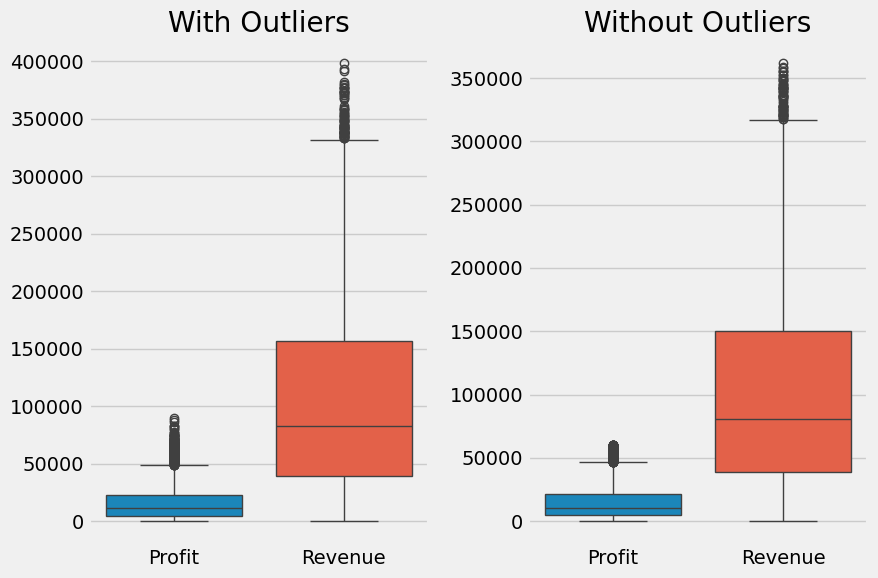

In [ ]:
# For both Profit and Discount
plt.figure(figsize=(9, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=df[['Profit', 'Revenue']])
plt.title('With Outliers')

plt.subplot(1, 2, 2)
sns.boxplot(data=df_no_outliers[['Profit', 'Revenue']])
plt.title('Without Outliers')

plt.tight_layout()
plt.show()

In [18]:
# Breakdown 'Order Date' column into 'Week_day', 'Day', Month' and 'Year' column.
df['Week_day'] = df['Order Date'].dt.weekday
df['Day'] = df['Order Date'].dt.day
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Quarter'] = df['Order Date'].dt.to_period('Q')

# Turn 'Week_day' column into names of the days
df = df.replace(to_replace = {'Week_day' : {0 : 'Monday', 1 : 'Tuesday', 2 : 'Wednesday',
                                            3 : 'Thursday', 4 : 'Friday', 5 : 'Saturday',
                                            6 : 'Sunday'}}, regex=True)

df.head()

,Order ID,Order Date,Customer Name,Region,City,Category,Sub-Category,Product Name,Quantity,Unit Price,Discount,Sales,Profit,Payment Mode,Revenue,Week_day,Day,Year,Month,Quarter
0,10001,2024-10-19,Kashvi Varty,South,Bangalore,Books,Non-Fiction,Non-Fiction Ipsum,2,36294,5,68958.6,10525.09,Debit Card,68958.6,Saturday,19,2024,10,2024Q4
1,10002,2025-08-30,Advik Desai,North,Delhi,Groceries,Rice,Rice Nemo,1,42165,20,33732.0,6299.66,Debit Card,33732.0,Saturday,30,2025,8,2025Q3
2,10003,2023-11-04,Rhea Kalla,East,Patna,Kitchen,Juicer,Juicer Odio,4,64876,20,207603.2,19850.27,Credit Card,207603.2,Saturday,4,2023,11,2023Q4
3,10004,2025-05-23,Anika Sen,East,Kolkata,Groceries,Oil,Oil Doloribus,5,37320,15,158610.0,36311.02,UPI,158610.0,Friday,23,2025,5,2025Q2
4,10005,2025-01-19,Akarsh Kaul,West,Pune,Clothing,Kids Wear,Kids Wear Quo,1,50037,10,45033.3,9050.04,Debit Card,45033.3,Sunday,19,2025,1,2025Q1


In [19]:
df.dtypes

,0
Order ID,int64
Order Date,datetime64[ns]
Customer Name,object
Region,object
City,object
Category,object
Sub-Category,object
Product Name,object
Quantity,int64
Unit Price,int64


In [20]:
# Sorting certain columns to see an overview of data from the smallest to the largest value
df.sort_values(by=[ 'Unit Price'])

,Order ID,Order Date,Customer Name,Region,City,Category,Sub-Category,Product Name,Quantity,Unit Price,Discount,Sales,Profit,Payment Mode,Revenue,Week_day,Day,Year,Month,Quarter
3922,13923,2024-09-12,Khushi Iyer,East,Bhubaneswar,Toys,Puzzle,Puzzle Occaecati,3,222,15,566.10,97.74,Debit Card,566.10,Thursday,12,2024,9,2024Q3
739,10740,2024-02-02,Shaan Bhasin,East,Ranchi,Groceries,Oil,Oil Quia,5,228,20,912.00,169.99,UPI,912.00,Friday,2,2024,2,2024Q1
4183,14184,2024-05-28,Yakshit Gola,South,Bangalore,Toys,RC Car,RC Car Iure,2,230,10,414.00,97.91,UPI,414.00,Tuesday,28,2024,5,2024Q2
2996,12997,2024-04-22,Myra Ramaswamy,West,Surat,Beauty,Lipstick,Lipstick Accusantium,3,264,0,792.00,151.42,Net Banking,792.00,Monday,22,2024,4,2024Q2
2662,12663,2025-09-05,Hunar Dara,North,Jaipur,Clothing,Kids Wear,Kids Wear Odio,3,265,5,755.25,40.74,COD,755.25,Friday,5,2025,9,2025Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4385,14386,2025-06-03,Tara Raju,North,Amritsar,Home Decor,Lamp,Lamp Deserunt,1,79898,20,63918.40,11228.51,Net Banking,63918.40,Tuesday,3,2025,6,2025Q2
1714,11715,2025-08-12,Kimaya Divan,West,Ahmedabad,Furniture,Bed,Bed Ullam,3,79930,0,239790.00,40314.98,Net Banking,239790.00,Tuesday,12,2025,8,2025Q3
2519,12520,2024-07-06,Tushar Jain,West,Goa,Beauty,Face Cream,Face Cream Pariatur,2,79948,20,127916.80,20455.65,UPI,127916.80,Saturday,6,2024,7,2024Q3
2059,12060,2024-01-14,Nitya Kale,East,Kolkata,Electronics,Headphones,Headphones Illo,1,79977,10,71979.30,16673.46,Net Banking,71979.30,Sunday,14,2024,1,2024Q1


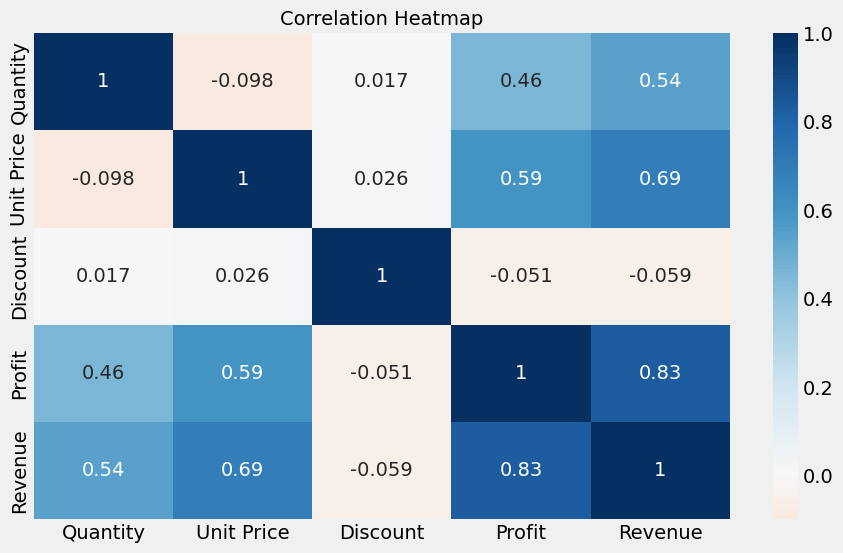

In [21]:
selected_columns = ['Quantity', 'Unit Price', 'Discount', 'Profit', 'Revenue']

plt.figure(figsize = (10,6))
heatmap = sns.heatmap(df[selected_columns].corr(numeric_only=True), annot=True, cmap='RdBu', center=0)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14})
plt.show()

In [22]:
# Best Selling Category
fig = px.treemap(data_frame=df,
                path=[px.Constant('<b> Category Items'),
                      'Sub-Category'],
                title = '<b> Best Selling Category Items (2024 & 2025)',
                values= 'Profit',
                 color= 'Profit',
                 color_continuous_scale='Blues')

fig.data[0].textinfo = 'label+text+value'

fig.update_traces(root_color='lightgrey')

#fig.update_layout(treemapcolorway = ['burlywood', 'cadetblue'],
                  #margin = dict(t=50, l=20, r=20, b=20))

fig.layout.hovermode = False
fig.show()

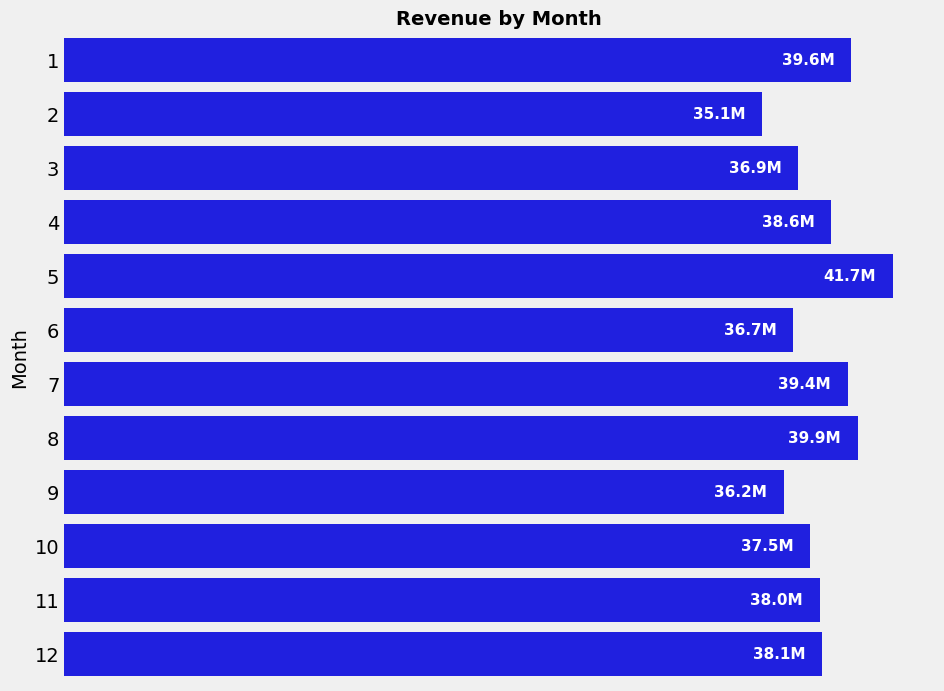

In [23]:
rev_month = df.groupby(['Month'])['Revenue'].sum().reset_index().sort_values(by='Revenue', ascending=False)

fig = plt.figure(figsize = (10,8))
color = 'blue'
ax = sns.barplot(data=rev_month, x='Revenue', y='Month', color=color, orient='h') # Changed palette to color


for i in ax.containers:
    labels = [f'{val/1e6:.1f}M' for val in i.datavalues]
    ax.bar_label(i, labels=labels, padding=-50, color='white',
                 fontsize=11, fontweight='bold')

plt.ylabel('Month', size=14)
plt.title('Revenue by Month', size=14, fontweight='bold')

# Removes frame lines
ax.spines[['right', 'top', 'bottom', 'left']].set_visible(False)
ax.xaxis.set_visible(False)
plt.show()

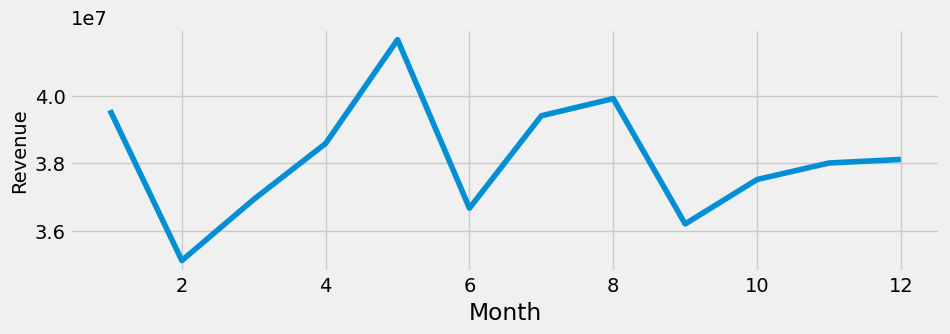

In [ ]:
plt.figure(figsize = (10,3))
df.groupby(['Month'])['Revenue'].sum().plot()
plt.ylabel('Revenue', size=14)
plt.show()

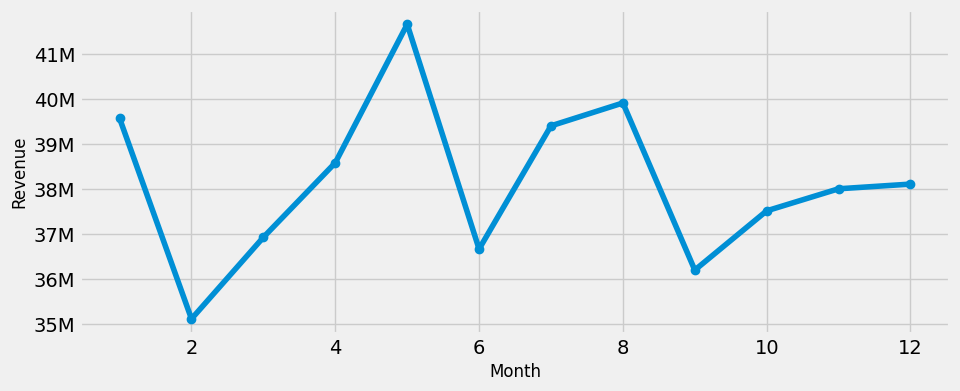

In [25]:
import matplotlib.ticker as ticker

plt.figure(figsize = (10,4))
plot_ax = df.groupby(['Month'])['Revenue'].sum().plot(marker='o')

# Remove scientific format on the Y axis
plot_ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.0f}M'))

plt.ylabel('Revenue', size=12)
plt.xlabel('Month', size=12)
plt.show()

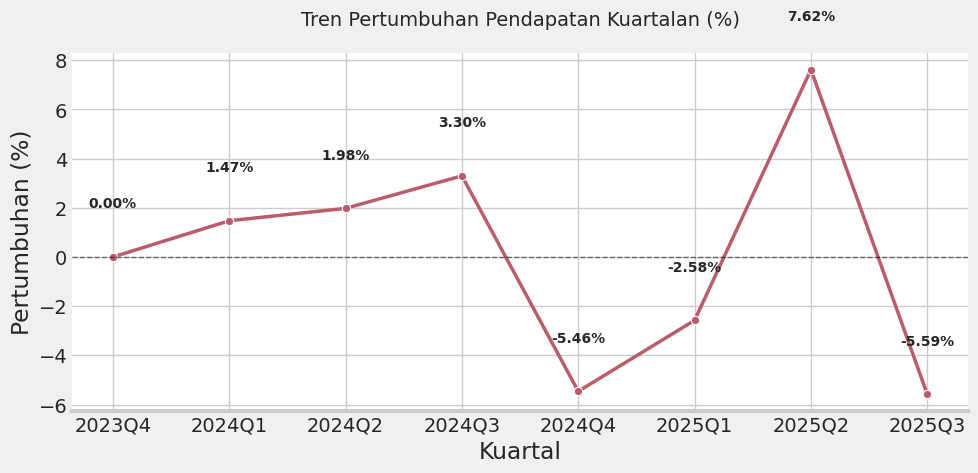

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Hitung pertumbuhan Quarter-on-Quarter (paling standar)
# pct_change() membandingkan baris sekarang dengan baris sebelumnya
rev_quarter = df.groupby(['Quarter'])['Revenue'].sum()
rev_growth = rev_quarter.pct_change() * 100
rev_growth = rev_growth.fillna(0) # Mengisi data pertama yang kosong dengan 0

# Convert 'Quarter' to string type for plotting
plot_data = rev_growth.reset_index()
plot_data['Quarter'] = plot_data['Quarter'].astype(str)

# Filter out 2025Q4
plot_data = plot_data[plot_data['Quarter'] != '2025Q4']

# 2. Visualisasi dengan Line Chart
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid") # Menambah grid agar angka negatif lebih jelas

# Membuat plot garis
ax = sns.lineplot(data=plot_data, x='Quarter', y='Revenue',
                  marker='o', color='#b95d6a', linewidth=2.5)

# Menambahkan label angka di setiap titik
for x, y in enumerate(plot_data['Revenue']):
    ax.text(x, y + 2, f'{y:.2f}%', ha='center', fontweight='bold', fontsize=10)

plt.title('Tren Pertumbuhan Pendapatan Kuartalan (%)', size=14, pad=20)
plt.ylabel('Pertumbuhan (%)')
plt.xlabel('Kuartal')

# Menambahkan garis horizontal di titik 0 agar terlihat mana yang minus
plt.axhline(0, color='black', linestyle='--', linewidth=1, alpha=0.5)

sns.despine(left=True) # Menghilangkan border samping agar bersih
plt.tight_layout()
plt.show()

In [26]:
# Revenue by Day
profitable_menu = df.groupby('Week_day', observed=False).sum(numeric_only=True)['Revenue'].sort_values(ascending=False)

fig = px.bar(profitable_menu,
             color=profitable_menu,
             color_continuous_scale=px.colors.sequential.Blues)

fig.update_layout(margin=dict(t=70, b=10, l=20, r=20),
                  title='<b> Revenue by Day (2024 & 2025)', title_x = 0.5,
                  titlefont=dict(size=20),
                  xaxis_tickangle=-0,
                  yaxis = {'categoryorder':'category ascending'},
                  plot_bgcolor='white',
                  coloraxis_showscale=False)
fig.update_yaxes(showticklabels=True,
                 title='<b> Revenue')
fig.update_xaxes(title='<b> Day')
fig.update_traces(texttemplate='%{y}',
                  textposition='inside',
                  hovertemplate = '<b>%{x}</b><br>Revenue: %{y}')
fig.show()

In [30]:
# ADS (Average Daily Sales) 2024
data_2024 = df[(df['Quarter'] >= '2024Q1') & (df['Quarter'] <= '2024Q3')]
ads_2024 = data_2024['Revenue'].sum() / data_2024['Order Date'].nunique()
print('ADS 2024:', '$', '%.2f' % ads_2024)

# ADS (Average Daily Sales) 2025
data_2025 = df[(df['Quarter'] >= '2025Q1') & (df['Quarter'] <= '2025Q3')]
ads_2025 = data_2025['Revenue'].sum() / data_2025['Order Date'].nunique()
print('ADS 2025:', '$', '%.2f' % ads_2025)

ADS 2024: $ 635386.96
ADS 2025: $ 622581.69


In [34]:
# ATV (Average Transaction Value) 2024
data_24 = df[(df['Quarter'] >= '2024Q1') & (df['Quarter'] <= '2024Q3')]
atv_2024 = data_24['Revenue'].sum() / data_24['Order ID'].nunique()
print('ATV 2024:', '$', '%.2f' % atv_2024)

# ATV (Average Transaction Value) 2025
data_25 = df[(df['Quarter'] >= '2025Q1') & (df['Quarter'] <= '2025Q3')]
atv_2025 = data_25['Revenue'].sum() / data_25['Order ID'].nunique()
print('ATV 2025', '$', '%.2f' % atv_2025)

ATV 2024: $ 95920.68
ATV 2025 $ 96790.89


In [55]:
# Revenue Growth
rev_2024 = df[(df['Quarter'] >= '2024Q1') & (df['Quarter'] <= '2024Q3')]['Revenue'].sum(numeric_only=True)
rev_2025 = df[(df['Quarter'] >= '2025Q1') & (df['Quarter'] <= '2025Q3')]['Revenue'].sum(numeric_only=True)

revenue_growth = (rev_2025 - rev_2024)/rev_2024*100
print(f'Revenue Growth:', '%.2f' % revenue_growth,'%')

Revenue Growth: -2.37 %
